In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data//cleaned_life_expectancy_data.csv")

In [3]:
numeric_df = df.select_dtypes(include=[np.number])

print(numeric_df.describe())


              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

In [4]:
print(f'Correlations: {numeric_df.corr()}')

Correlations:                                      Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.170033        -0.079052   
Life expectancy                  0.170033          1.000000        -0.696359   
Adult Mortality                 -0.079052         -0.696359         1.000000   
infant deaths                   -0.037415         -0.196557         0.078756   
Alcohol                         -0.052990          0.404877        -0.195848   
percentage expenditure           0.031400          0.381864        -0.242860   
Hepatitis B                      0.104333          0.256762        -0.162476   
Measles                         -0.082493         -0.157586         0.031176   
 BMI                             0.108974          0.567694        -0.387017   
under-five deaths               -0.042937         -0.222529         0.094146   
Polio                            0.094158          0.465556        -0.274823   
Total expenditure         

                                     Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.170033        -0.079052   
Life expectancy                  0.170033          1.000000        -0.696359   
Adult Mortality                 -0.079052         -0.696359         1.000000   
infant deaths                   -0.037415         -0.196557         0.078756   
Alcohol                         -0.052990          0.404877        -0.195848   
percentage expenditure           0.031400          0.381864        -0.242860   
Hepatitis B                      0.104333          0.256762        -0.162476   
Measles                         -0.082493         -0.157586         0.031176   
 BMI                             0.108974          0.567694        -0.387017   
under-five deaths               -0.042937         -0.222529         0.094146   
Polio                            0.094158          0.465556        -0.274823   
Total expenditure                0.09074

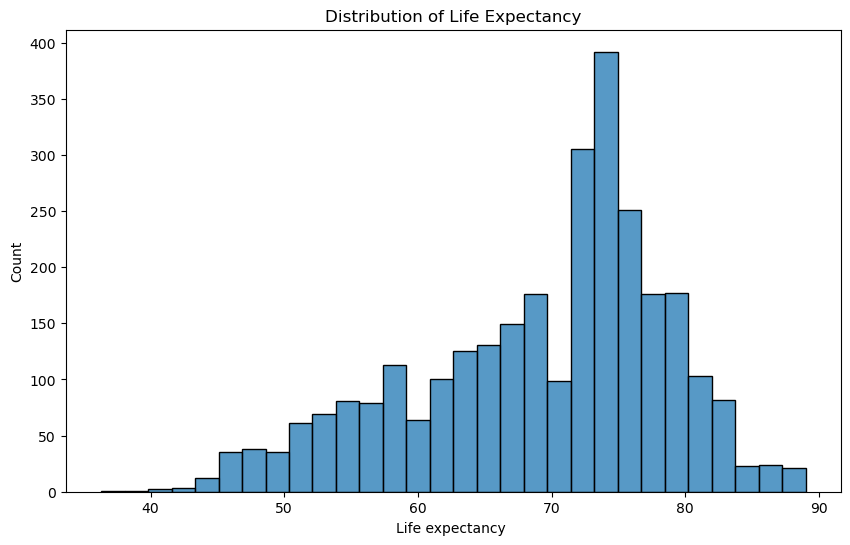

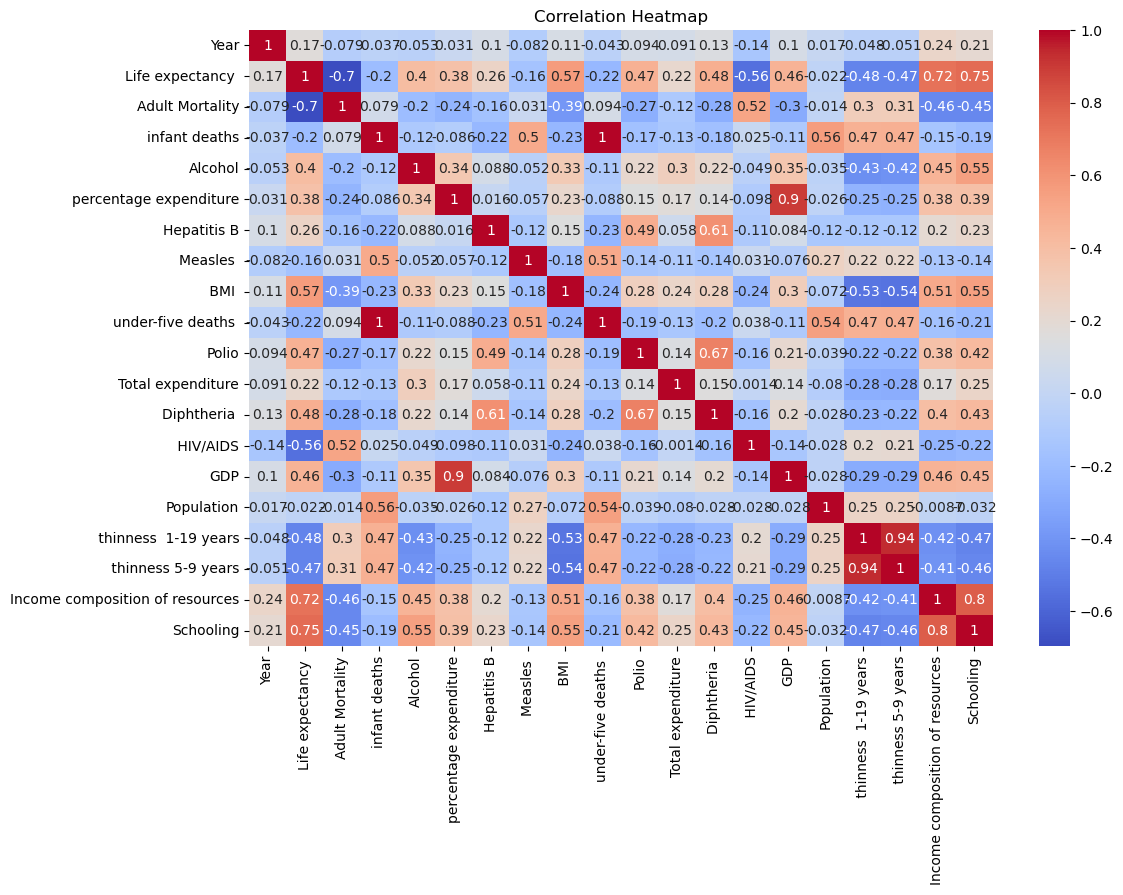

In [5]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


# Distribution of Life Expectancy
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '].dropna(), bins=30)
plt.title('Distribution of Life Expectancy')
plt.savefig('distribution_life_expectancy.png')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

In [6]:
# Correlation with Life Expectancy
correlation = numeric_df.corr()['Life expectancy '].sort_values(ascending=False)
print(correlation)


Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


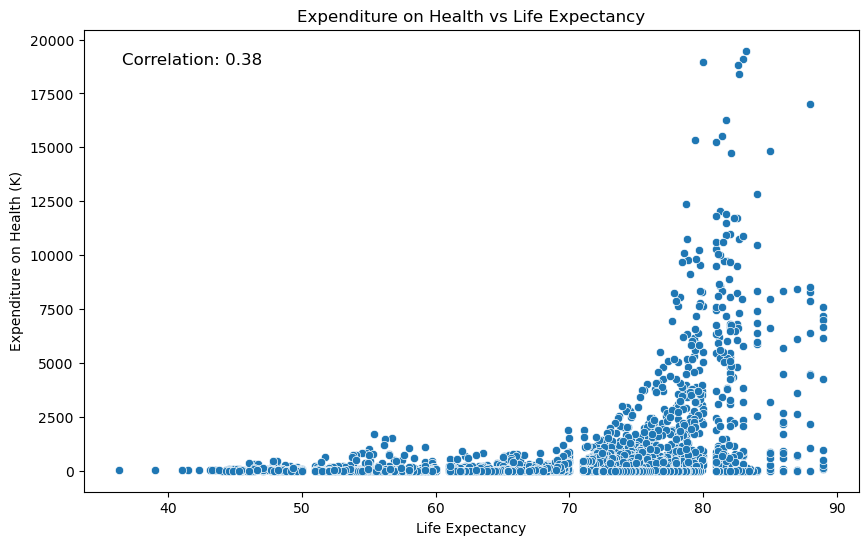

In [7]:
correlation = df['percentage expenditure'].corr(df['Life expectancy '])

plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='Life expectancy ', y='percentage expenditure', data=df)

# Add title and labels
plt.title('Expenditure on Health vs Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Expenditure on Health (K)')

# Display the correlation coefficient on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Save the plot
plt.savefig('expenditure_life_expectancy_with_correlation.png')

# Show the plot
plt.show()

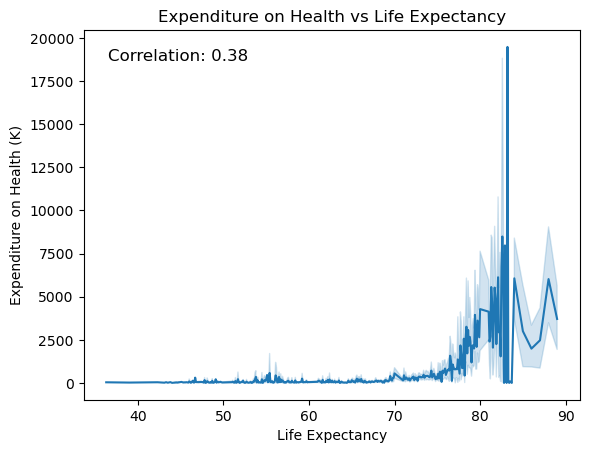

In [8]:
correlation = df['percentage expenditure'].corr(df['Life expectancy '])

sns.lineplot(y='percentage expenditure', x='Life expectancy ', data=df)

# Add title and labels
plt.title('Expenditure on Health vs Life Expectancy')
plt.ylabel('Expenditure on Health (K)')
plt.xlabel('Life Expectancy')

# Display the correlation coefficient
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Save the plot
plt.savefig('expenditure_life_expectancy_line_plot.png')

# Show the plot
plt.show()

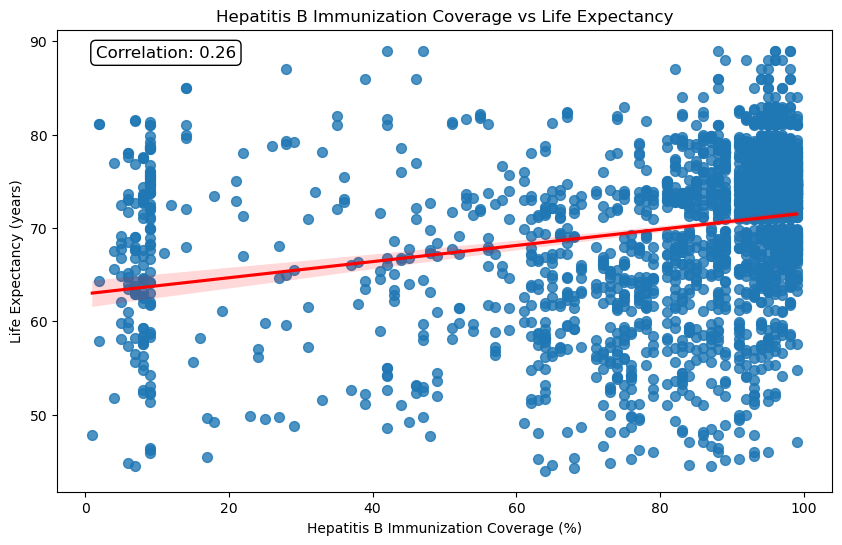

In [9]:
# Scatter Plot: Hep B Immunization Coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.regplot(x='Hepatitis B', y='Life expectancy ', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Hepatitis B Immunization Coverage vs Life Expectancy')
plt.xlabel('Hepatitis B Immunization Coverage (%)')
plt.ylabel('Life Expectancy (years)')
plt.savefig('Hepatitis_B_life_expectancy.png')

# Calculate the Pearson correlation coefficient
hep_b_correlation = df['Hepatitis B'].corr(df['Life expectancy '])

#add correlation coefficient
plt.text(0.05, 0.95, f'Correlation: {hep_b_correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', 
         bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
plt.savefig('hep_b_vs_life_expectancy.png')
plt.show()

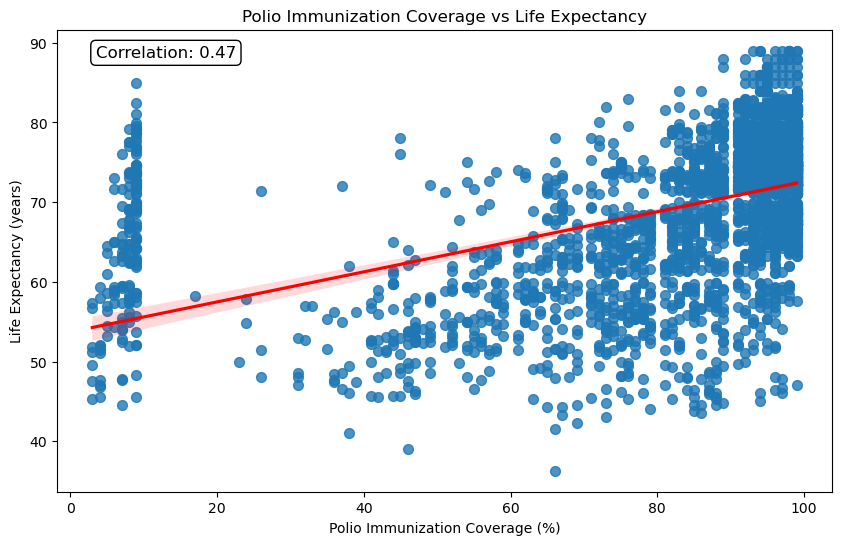

In [10]:
# Scatter Plot: Polio Immunization Coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.regplot(x='Polio', y='Life expectancy ', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Polio Immunization Coverage vs Life Expectancy')
plt.xlabel('Polio Immunization Coverage (%)')
plt.ylabel('Life Expectancy (years)')
plt.savefig('polio_life_expectancy.png')

# Calculate the Pearson correlation coefficient
polio_correlation = df['Polio'].corr(df['Life expectancy '])

#add correlation coefficient
plt.text(0.05, 0.95, f'Correlation: {polio_correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', 
         bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.savefig('polio_vs_life_expectancy.png')
plt.show()

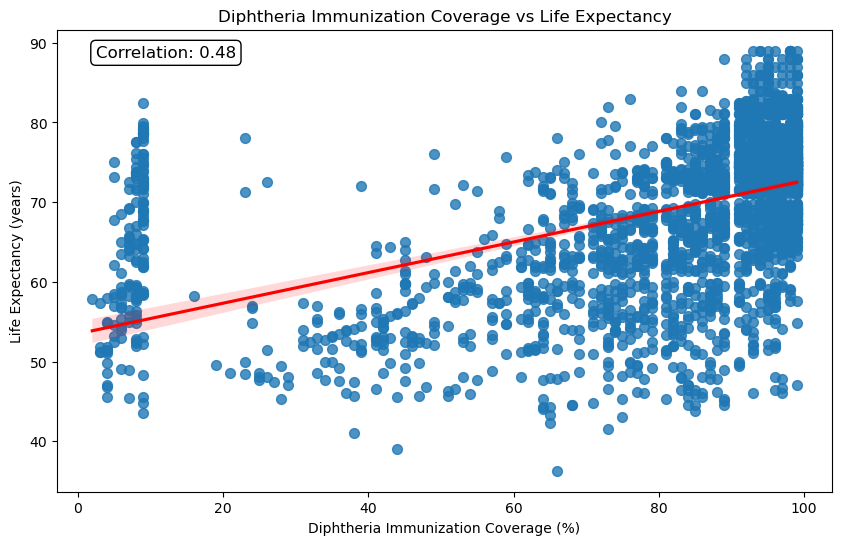

In [11]:
# Scatter Plot: Diphtheria Immunization Coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.regplot(x='Diphtheria ', y='Life expectancy ', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Diphtheria Immunization Coverage vs Life Expectancy')
plt.xlabel('Diphtheria Immunization Coverage (%)')
plt.ylabel('Life Expectancy (years)')
plt.savefig('Diphtheria_life_expectancy.png')

# Calculate the Pearson correlation coefficient
diphtheria_correlation = df['Diphtheria '].corr(df['Life expectancy '])

#add correlation coefficient
plt.text(0.05, 0.95, f'Correlation: {diphtheria_correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', 
         bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.savefig('diphtheria_vs_life_expectancy.png')
plt.show()

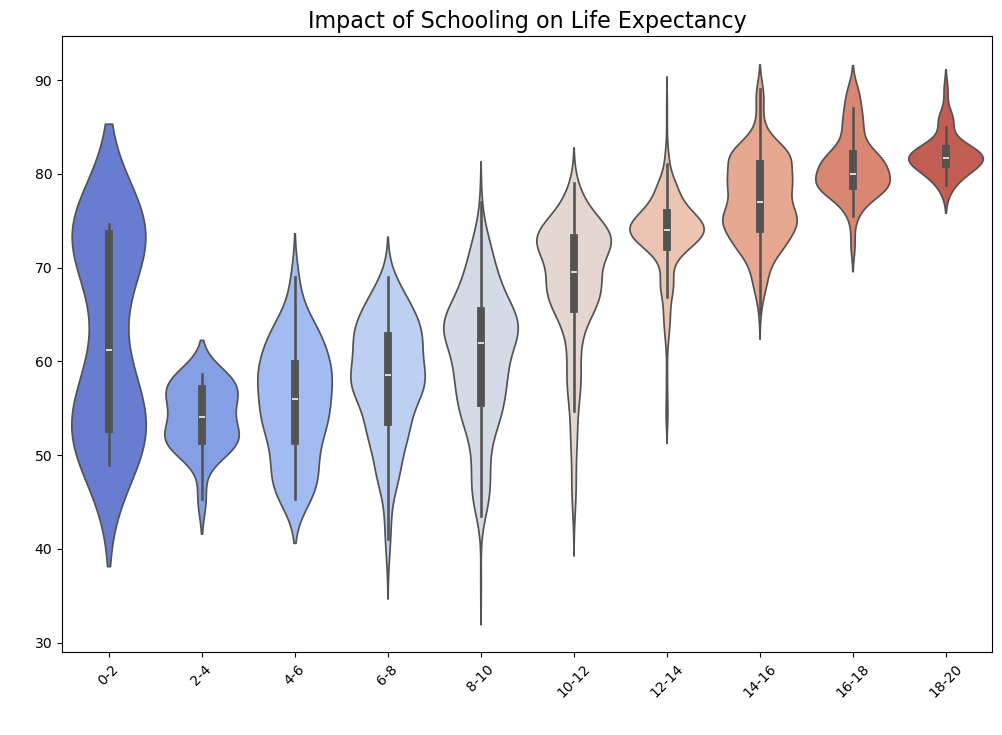

In [12]:
coolwarm_palette = sns.color_palette("coolwarm", n_colors=10)

# Create a new DataFrame with Schooling bins for visualization
df_with_bins = numeric_df.copy()
df_with_bins['Schooling_bins'] = pd.cut(df_with_bins['Schooling'], bins=10)

# Create a violin plot with the discrete color palette
plt.figure(figsize=(12, 8))
sns.violinplot(x='Schooling_bins', y='Life expectancy ', data=df_with_bins, palette=coolwarm_palette, hue='Schooling_bins', legend=False)

# Customize the x-axis to show bin intervals
bin_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in df_with_bins['Schooling_bins'].cat.categories]
plt.xticks(ticks=np.arange(len(bin_labels)), labels=bin_labels, rotation=45)

# Add titles and labels
plt.title('Impact of Schooling on Life Expectancy', fontsize=16)
plt.xlabel('Schooling (years)', fontsize=14, color='white')
plt.ylabel('Life Expectancy (years)', fontsize=14, color='white')

# Save and show the plot
plt.savefig('schooling_life_expectancy_coolwarm.png', dpi=300, bbox_inches='tight')
plt.show()

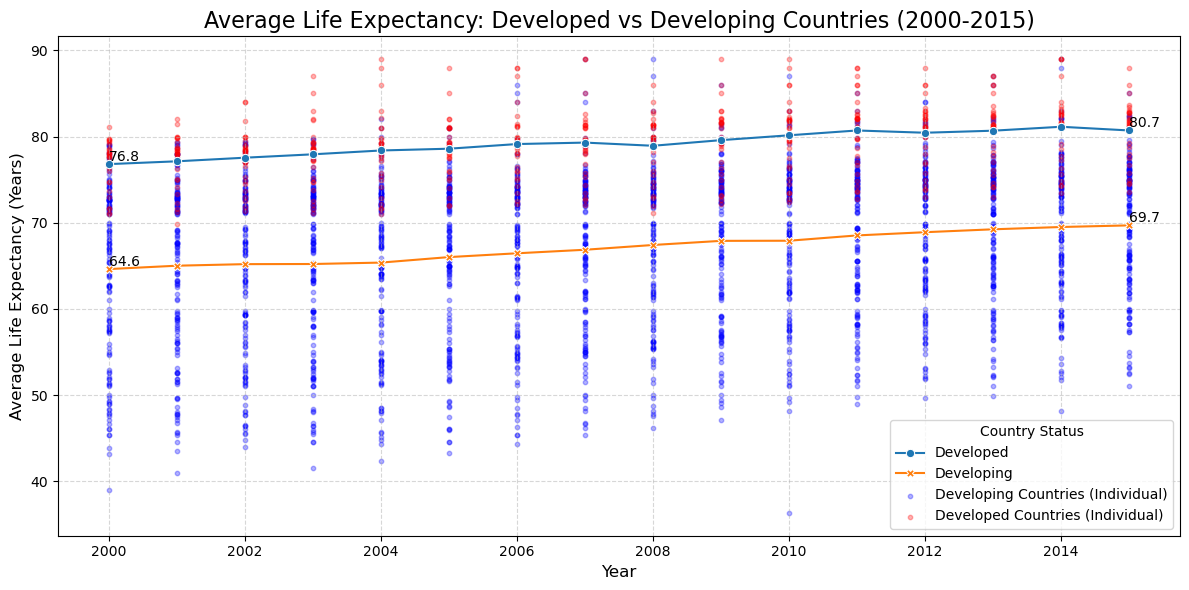

In [13]:
# Group the data by Year and Status, calculating mean life expectancy
by_status = df.groupby(['Year', 'Status'])['Life expectancy '].mean().unstack()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=by_status, markers=True, dashes=False)

# Add scatter plots for individual countries
for status in df['Status'].unique():
    status_data = df[df['Status'] == status]
    plt.scatter(status_data['Year'], status_data['Life expectancy '], 
                alpha=0.3, s=10, 
                c='red' if status == 'Developed' else 'blue', 
                label=f'{status} Countries (Individual)')
    
# Customize the plot
plt.title('Average Life Expectancy: Developed vs Developing Countries (2000-2015)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Life Expectancy (Years)', fontsize=12)
plt.legend(title='Country Status', fontsize=10)

# Improve readability
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)

# Add value labels at the start and end of each line
for status in by_status.columns:
    plt.text(by_status.index[0], by_status[status].iloc[0], 
             f'{by_status[status].iloc[0]:.1f}', 
             verticalalignment='bottom')
    plt.text(by_status.index[-1], by_status[status].iloc[-1], 
             f'{by_status[status].iloc[-1]:.1f}', 
             verticalalignment='bottom')

# Improve layout
plt.tight_layout()

# Save the plot
plt.savefig('life_expectancy_developed_vs_developing_correlation.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


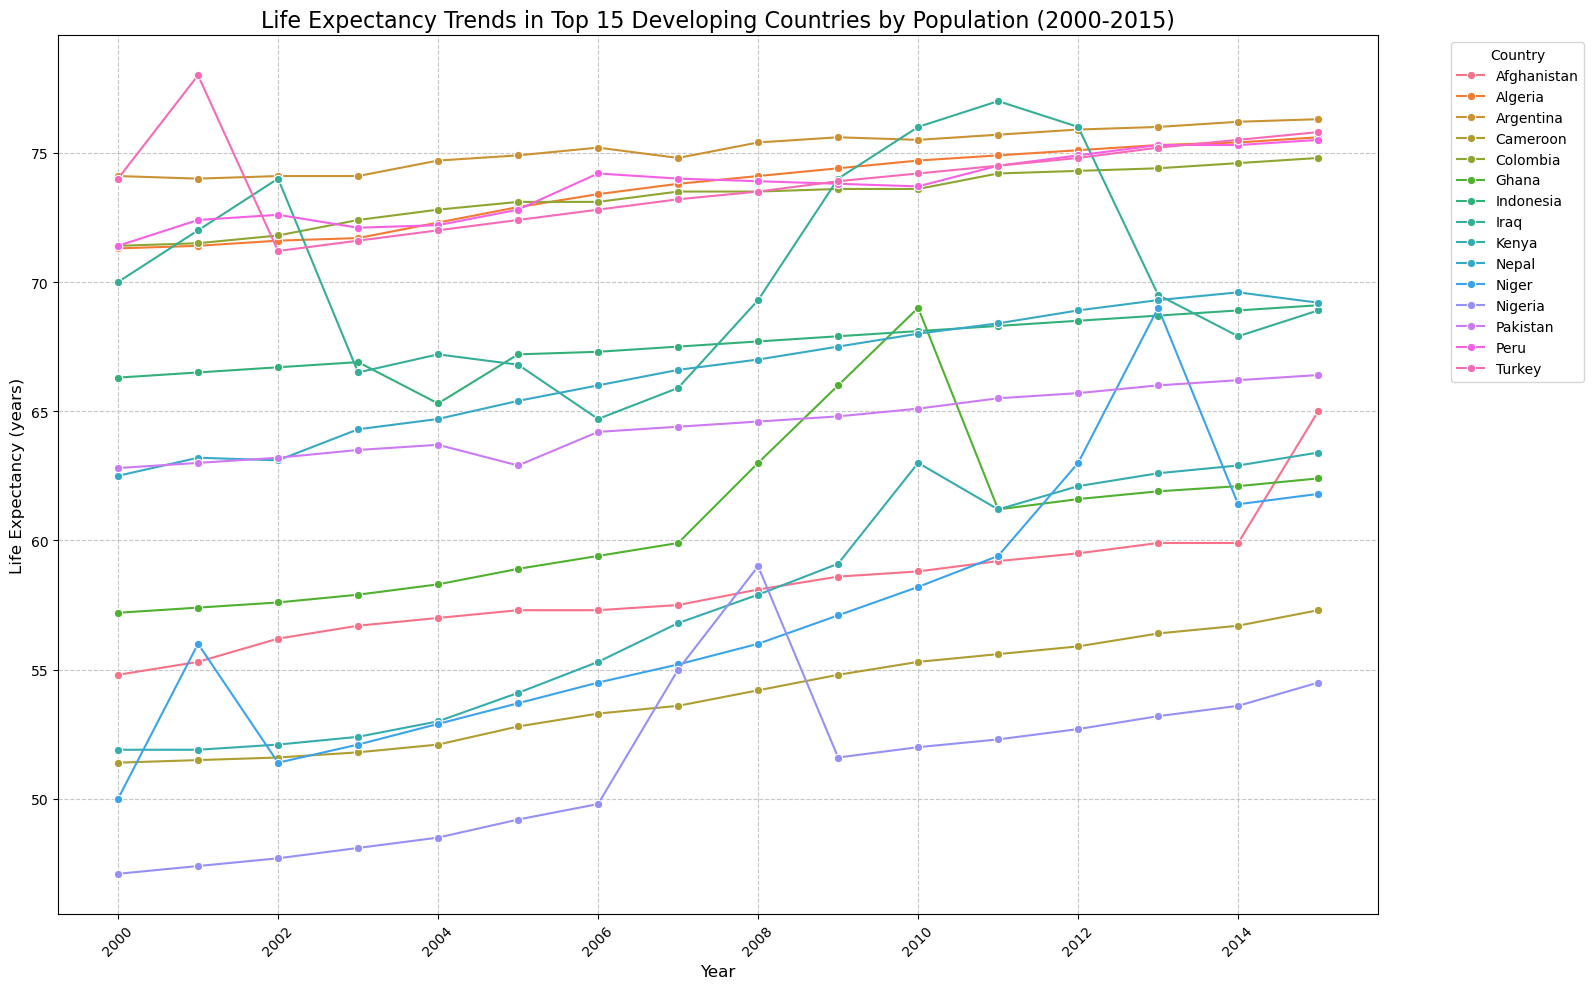

In [14]:
# Filter for developing countries
developing_df = df[df['Status'] == 'Developing']

# Select a subset of countries (e.g., top 15 by population in 2015)
top_countries = developing_df[developing_df['Year'] == 2015].nlargest(15, 'Population')['Country'].tolist()

# Filter the dataframe for these countries
plot_df = developing_df[developing_df['Country'].isin(top_countries)]

# Create the plot
plt.figure(figsize=(16, 10))
sns.lineplot(data=plot_df, x='Year', y='Life expectancy ', hue='Country', marker='o')

plt.title('Life Expectancy Trends in Top 15 Developing Countries by Population (2000-2015)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve legend
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()